## Import files

In [143]:
import pandas as pd
import re


## Importing the txt file and split dates and messeges

In [144]:
f=open('WhatsApp Chat with EDIFICATION 4 (1).txt','r', encoding= 'utf-8')
data=f.read()
# print(data)

In [145]:
# pattern='\d{1,2}\/\d{1,2}\/\d{2,4},\s \d{1,2}:\d{2}\s-\s'
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
message=re.split(pattern,data)[1:]
# print(messeges)

In [146]:
dates=re.findall(pattern,data)
# dates

## Creating pandas dataframe

In [147]:
df=pd.DataFrame({"user_message":message,"message_date":dates})
df["message_date"]=pd.to_datetime(df["message_date"], format='%m/%d/%y, %H:%M - ')
df.rename(columns={'message_date' : 'date'},inplace=True)
df.head()

,user_message,date
0,"You created group ""EDIFICATION 4""\n",2021-07-02 19:26:00
1,😈~Ken Kaneki~😈: Itna sannata kaiko re\n,2022-08-28 19:36:00
2,Dipayan: Match dekho...\n,2022-08-28 19:44:00
3,😈~Ken Kaneki~😈: Phone dek6i\n,2022-08-28 19:52:00
4,😈~Ken Kaneki~😈: 🙂\n,2022-08-28 19:52:00


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_message  11333 non-null  object        
 1   date          11333 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 177.2+ KB


In [149]:
# df["user_message"]=df["user_message"].astype('string') #own change

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_message  11333 non-null  object        
 1   date          11333 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 177.2+ KB


In [151]:
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['users']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\indra\AppData\Local\Temp\ipykernel_4668\3234378266.py:4: SyntaxWarning: invalid escape sequence '\w'
  entry=re.split('([\w\W]+?):\s',message)


In [152]:
df

,date,users,message
0,2021-07-02 19:26:00,group_notification,"You created group ""EDIFICATION 4""\n"
1,2022-08-28 19:36:00,😈~Ken Kaneki~😈,Itna sannata kaiko re\n
2,2022-08-28 19:44:00,Dipayan,Match dekho...\n
3,2022-08-28 19:52:00,😈~Ken Kaneki~😈,Phone dek6i\n
4,2022-08-28 19:52:00,😈~Ken Kaneki~😈,🙂\n
...,...,...,...
11328,2024-02-22 11:26:00,Tuhin Da Spoken,Khub ekta vlo na\n
11329,2024-02-22 11:37:00,Dam 2,Desert khawar por rutii valo lagbeo naa\n
11330,2024-02-22 11:37:00,Dam 2,😶‍🌫😶‍🌫\n
11331,2024-02-22 11:39:00,Avijit Sir,😁\n


## Extract from dataframe

In [153]:
df["year"]=df["date"].dt.year

In [154]:
df["month"]=df["date"].dt.month_name()

In [155]:
df["day"]=df["date"].dt.day

In [156]:
df["hour"]=df["date"].dt.hour

In [157]:
df["minute"]=df["date"].dt.minute

In [158]:
df.head()

,date,users,message,year,month,day,hour,minute
0,2021-07-02 19:26:00,group_notification,"You created group ""EDIFICATION 4""\n",2021,July,2,19,26
1,2022-08-28 19:36:00,😈~Ken Kaneki~😈,Itna sannata kaiko re\n,2022,August,28,19,36
2,2022-08-28 19:44:00,Dipayan,Match dekho...\n,2022,August,28,19,44
3,2022-08-28 19:52:00,😈~Ken Kaneki~😈,Phone dek6i\n,2022,August,28,19,52
4,2022-08-28 19:52:00,😈~Ken Kaneki~😈,🙂\n,2022,August,28,19,52


## Analysis part

In [159]:
df[df['users']=='Agradip'].shape

(45, 8)

In [160]:
words=[]

for message in df["message"]:
    words.extend(message.split())

In [161]:
len(words)

41500

In [162]:
new=df[df['message']=="<Media omitted>\n"]

In [163]:
new

,date,users,message,year,month,day,hour,minute
127,2022-08-29 11:04:00,Agradip,<Media omitted>\n,2022,August,29,11,4
128,2022-08-29 14:02:00,Dam 2,<Media omitted>\n,2022,August,29,14,2
199,2022-08-31 23:26:00,😈~Ken Kaneki~😈,<Media omitted>\n,2022,August,31,23,26
206,2022-09-01 13:53:00,😈~Ken Kaneki~😈,<Media omitted>\n,2022,September,1,13,53
209,2022-09-01 15:01:00,😈~Ken Kaneki~😈,<Media omitted>\n,2022,September,1,15,1
...,...,...,...,...,...,...,...,...
11257,2024-01-23 16:59:00,😈~Ken Kaneki~😈,<Media omitted>\n,2024,January,23,16,59
11277,2024-01-25 12:13:00,😈~Ken Kaneki~😈,<Media omitted>\n,2024,January,25,12,13
11282,2024-02-05 21:00:00,Avijit Sir,<Media omitted>\n,2024,February,5,21,0
11289,2024-02-05 21:01:00,😈~Ken Kaneki~😈,<Media omitted>\n,2024,February,5,21,1


In [164]:
links=[]
for message in df['message']:
      url_pattern = r'https?://\S+|www\.\S+' # Regular expression pattern to match URLs
      urls = re.findall(url_pattern,message) # Extract URLs from the text using the regular expression
      links.extend(urls) # Print the extracted URLs
print(links)


['https://www.google.com/search?q=india+vs&oq=Indiavs&aqs=chrome.1.69i57j0i10i512l2j0i512j0i10i512j0i20i263i512j0i10i512l3.7260j1j4&client=ms-android-transsion&sourceid=chrome-mobile&ie=UTF-8#sie=m;/g/11t7m45hy_;5;/m/02k52y;dt;fp;1;;;', 'https://fb.watch/fn15xINsvW/', 'https://chat.whatsapp.com/Jk5QqNrlAiECbj1GdjAK4b', 'https://youtu.be/L_a4kF4ypOE', 'https://www.facebook.com/rjpriyanka.siliguri/videos/647510623276450/?flite=scwspnss&mibextid=rDjTIhMUJ2rTaH6J', 'https://youtu.be/_w3OBiOwv_Y.', 'https://youtu.be/LWB5CPnR-cA', 'https://youtu.be/uHgvAaha3WQ', 'https://gpay.app.goo.gl/QfB4La', 'https://gpay.app.goo.gl/AmajX9', 'https://gpay.app.goo.gl/QE3cJv', 'https://chat.whatsapp.com/BdzOwAcCptBKBW4nDfoAmI', 'https://gpay.app.goo.gl/oc3cw1', 'https://www.instagram.com/p/Cl_bGesvkwj/?igshid=YmMyMTA2M2Y=', 'https://www.instagram.com/reel/CmEg-MRuX5s/?igshid=YmMyMTA2M2Y=', 'https://www.instagram.com/p/CmJRLdBP8Lk/?igshid=YmMyMTA2M2Y=', 'https://www.instagram.com/p/Cmaw6NDotuQ/?igshid=Yzg5M

In [168]:

x=df['users'].value_counts().head()

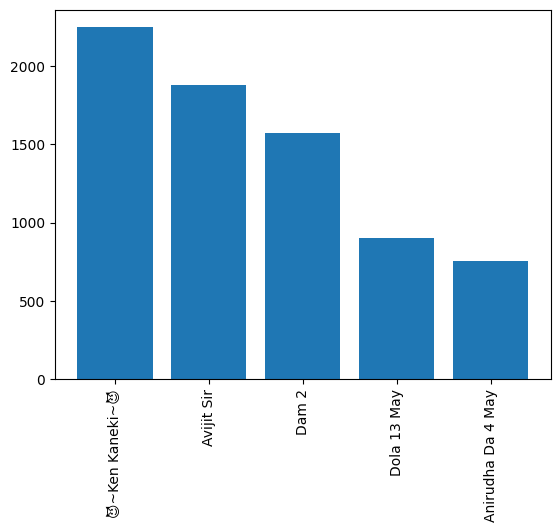

In [171]:
import matplotlib.pyplot as plt
name=x.index
count=x.values
plt.bar(name,count)    
plt.xticks(rotation="vertical")
plt.show()